In [1]:
import matplotlib.pyplot as plt
import time

In [2]:
from common_functions import *

2022-12-05 15:50:02.623859: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 15:50:03.336297: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-05 15:50:03.336359: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-05 15:50:03.336366: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [3]:
X, y, Xv, yv = load_mini_speech_commands()
X = slog(X)
Xv = slog(Xv)

Found 8000 files belonging to 8 classes.
Using 6400 files for training.
Using 1600 files for validation.


2022-12-05 15:50:04.708209: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 15:50:04.731039: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 15:50:04.731279: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-05 15:50:04.731810: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [13]:
model = models.Sequential([
    layers.Input(shape=(128,128,1)),
    layers.BatchNormalization(),
    lq.layers.QuantConv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    lq.layers.QuantConv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    lq.layers.QuantDense(128, activation='relu'),
    lq.layers.QuantDense(8),
])
lq.models.summary(model)

+sequential_1 stats-----------------------------------------------------------------------+
| Layer                  Input prec.             Outputs  # 32-bit    Memory  32-bit MACs |
|                              (bit)                           x 1      (kB)              |
+-----------------------------------------------------------------------------------------+
| batch_normalization_1            -   (-1, 128, 128, 1)         2      0.01            0 |
| quant_conv2d_2                   -  (-1, 126, 126, 32)       320      1.25      4572288 |
| max_pooling2d_2                  -    (-1, 63, 63, 32)         0         0            0 |
| quant_conv2d_3                   -    (-1, 61, 61, 64)     18496     72.25     68585472 |
| max_pooling2d_3                  -    (-1, 30, 30, 64)         0         0            0 |
| flatten_1                        -         (-1, 57600)         0         0            0 |
| quant_dense_2                    -           (-1, 128)   7372928  28800.50    

In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [15]:
train_acc = [];
test_acc = [];
elapsed_time = [];

50/50 [==============================] - 0s 4ms/step - loss: 1.4491 - accuracy: 0.8119


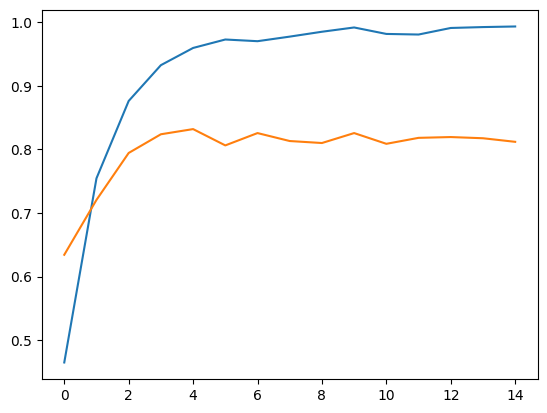

In [16]:
for i_iter in range(15):
    t = time.process_time()
    train_history = model.fit(x=X, y=y, epochs=1, batch_size=64);
    elapsed_time.append(time.process_time()-t)
    _, test_acc_i = model.evaluate(x=Xv, y=yv)
    train_acc.append(train_history.history['accuracy'][0])
    test_acc.append(test_acc_i)
plt.plot(np.vstack(train_acc))
plt.plot(np.vstack(test_acc))

In [18]:
print(np.median(elapsed_time), "seconds/iteration")
print(np.median(test_acc[-5:]), "test accuracy")

2.876771187000003 seconds/iteration
0.8174999952316284 test accuracy
